## Imports and common data

In [1]:
import TechCore.Simulator.simulator_optimized as simulator

from TechCore.Strategies.HW_6 import Future, Future_Current_Spread, Future_Absolute_Value_Restriction, Future_Stoikov

import TechCore.Simulator.get_info as get_info
import TechCore.Simulator.load_data as load_data

from importlib import reload

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

path_to_file = '../TechCore/data/md/btcusdt_Binance_LinearPerpetual/'

In [2]:
run_time = pd.Timedelta(10, 'm').delta
md = load_data.load_md_from_file(path=path_to_file, run_time=run_time)

In [3]:
latency = pd.Timedelta(10, 'ms').delta
md_latency = pd.Timedelta(10, 'ms').delta
delay = pd.Timedelta(0.1, 's').delta

In [4]:
reload(simulator)

reload(Future)
reload(Future_Current_Spread)
reload(Future_Stoikov)

reload(get_info)
reload(load_data)

<module 'TechCore.Simulator.load_data' from 'C:\\Users\\artem\\.Computer Science\\CMF\\Projects\\High_Frequency_Market_Making\\TechCore\\Simulator\\load_data.py'>

## Some info

Здесь планируется разобраться с различными способами приведения позиции к 0, если нам дан будущий Future Price.

Все стратегии живут в папке TechCore.Strategies.HW_6

И так мы имеем (пока это то что я придумал)
1) Просто Future (еще из 5 домашки, спред Стоикова)
2) Future с текущим спредом
3) Future c ограничением по модулю на позицию
4) Future со сдвигом Стоикова (как просто Стоиков юзает мидпрайс, так тут будет future price)

### 1

In [5]:
def run_Future(gamma):
    reload(simulator)
    reload(Future)
    reload(get_info)
    reload(load_data)

    sim = simulator.SimOptim(md, latency, md_latency)

    strat = Future.Strategy(
        delay=delay,
        future_timestamp=10**9, #ns
        risk_koef=gamma,
        time_oi=60*10**9,
        avg_sum_oi=800,
        avg_time_oi=57471412238,
        order_fees=-0.00001,
        avg_volatility=25,
        min_asset_value=0.001,
        volatility_record_cooldown=0.1*10**9, #ns
        volatility_horizon=1000,
        order_intensity_min_samples=100
    )
    strat.run(sim)
    return strat.logs

### 2

In [6]:
def run_Future_Current_Spread(gamma):
    reload(simulator)
    reload(Future_Current_Spread)
    reload(get_info)
    reload(load_data)

    sim = simulator.SimOptim(md, latency, md_latency)

    strat = Future_Current_Spread.Strategy(
        delay=delay,
        future_timestamp=10**9, #ns
        risk_koef=gamma,
        time_oi=60*10**9,
        avg_sum_oi=800,
        avg_time_oi=57471412238,
        order_fees=-0.00001,
        avg_volatility=25,
        min_asset_value=0.001,
        volatility_record_cooldown=0.1*10**9, #ns
        volatility_horizon=1000,
        order_intensity_min_samples=100
    )
    strat.run(sim)
    return strat.logs

### 3

In [7]:
def run_Future_Absolute_Value_Restriction(gamma, abs_value_restriction=0.01):
    reload(simulator)
    reload(Future_Absolute_Value_Restriction)
    reload(get_info)
    reload(load_data)

    sim = simulator.SimOptim(md, latency, md_latency)

    strat = Future_Absolute_Value_Restriction.Strategy(
        delay=delay,
        future_timestamp=10**9, #ns
        risk_koef=gamma,
        time_oi=60*10**9,
        avg_sum_oi=800,
        avg_time_oi=57471412238,
        order_fees=-0.00001,
        avg_volatility=25,
        min_asset_value=0.001,
        volatility_record_cooldown=0.1*10**9, #ns
        volatility_horizon=1000,
        abs_value_restriction=abs_value_restriction,
        order_intensity_min_samples=100
    )
    strat.run(sim)
    return strat.logs

### 4

In [8]:
def run_Future_Stoikov(gamma):
    reload(simulator)
    reload(Future)
    reload(get_info)
    reload(load_data)

    sim = simulator.SimOptim(md, latency, md_latency)

    strat = Future_Stoikov.Strategy(
        delay=delay,
        future_timestamp=10**9, #ns
        risk_koef=gamma,
        time_oi=60*10**9,
        avg_sum_oi=800,
        avg_time_oi=57471412238,
        order_fees=-0.00001,
        avg_volatility=25,
        min_asset_value=0.001,
        volatility_record_cooldown=0.1*10**9, #ns
        volatility_horizon=1000,
        order_intensity_min_samples=100
    )
    strat.run(sim)
    return strat.logs

### Run all

In [9]:
logs_1 = run_Future(0.1)
logs_2 = run_Future_Current_Spread(0.1)
logs_3 = run_Future_Absolute_Value_Restriction(0.1)
logs_4 = run_Future_Stoikov(0.1)

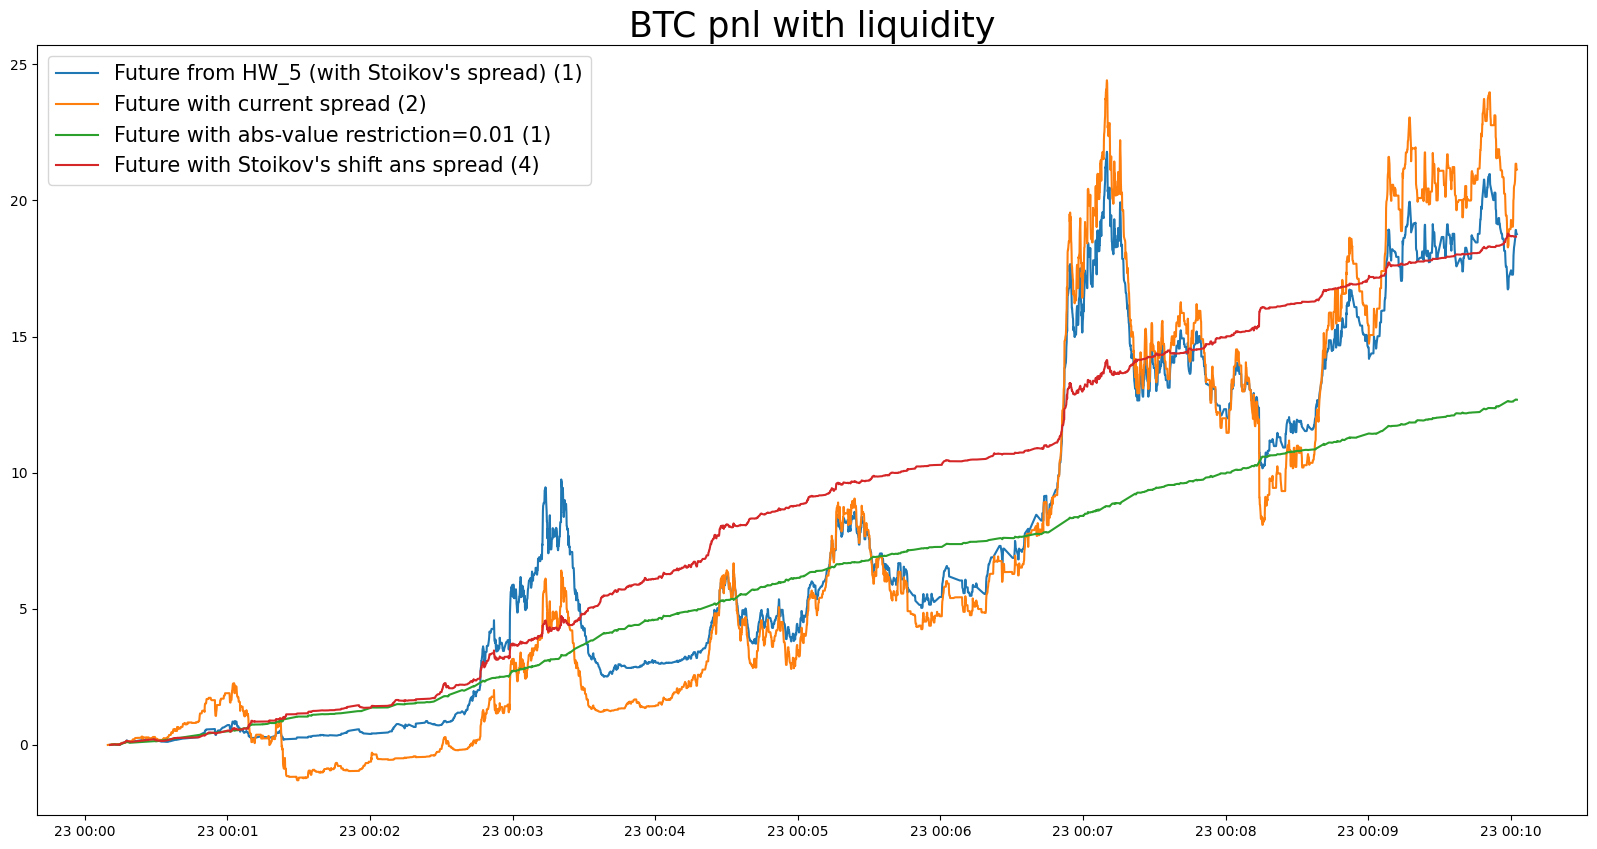

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(pd.to_datetime(logs_1['own_trade_time']), logs_1['pnl_with_liq'], label="Future from HW_5 (with Stoikov's spread) (1)")
plt.plot(pd.to_datetime(logs_2['own_trade_time']), logs_2['pnl_with_liq'], label="Future with current spread (2)")
plt.plot(pd.to_datetime(logs_3['own_trade_time']), logs_3['pnl_with_liq'], label="Future with abs-value restriction=0.01 (1)")
plt.plot(pd.to_datetime(logs_4['own_trade_time']), logs_4['pnl_with_liq'], label="Future with Stoikov's shift ans spread (4)")
plt.legend(fontsize=15)
plt.title('BTC pnl with liquidity', fontsize=25)
plt.plot()
plt.show()

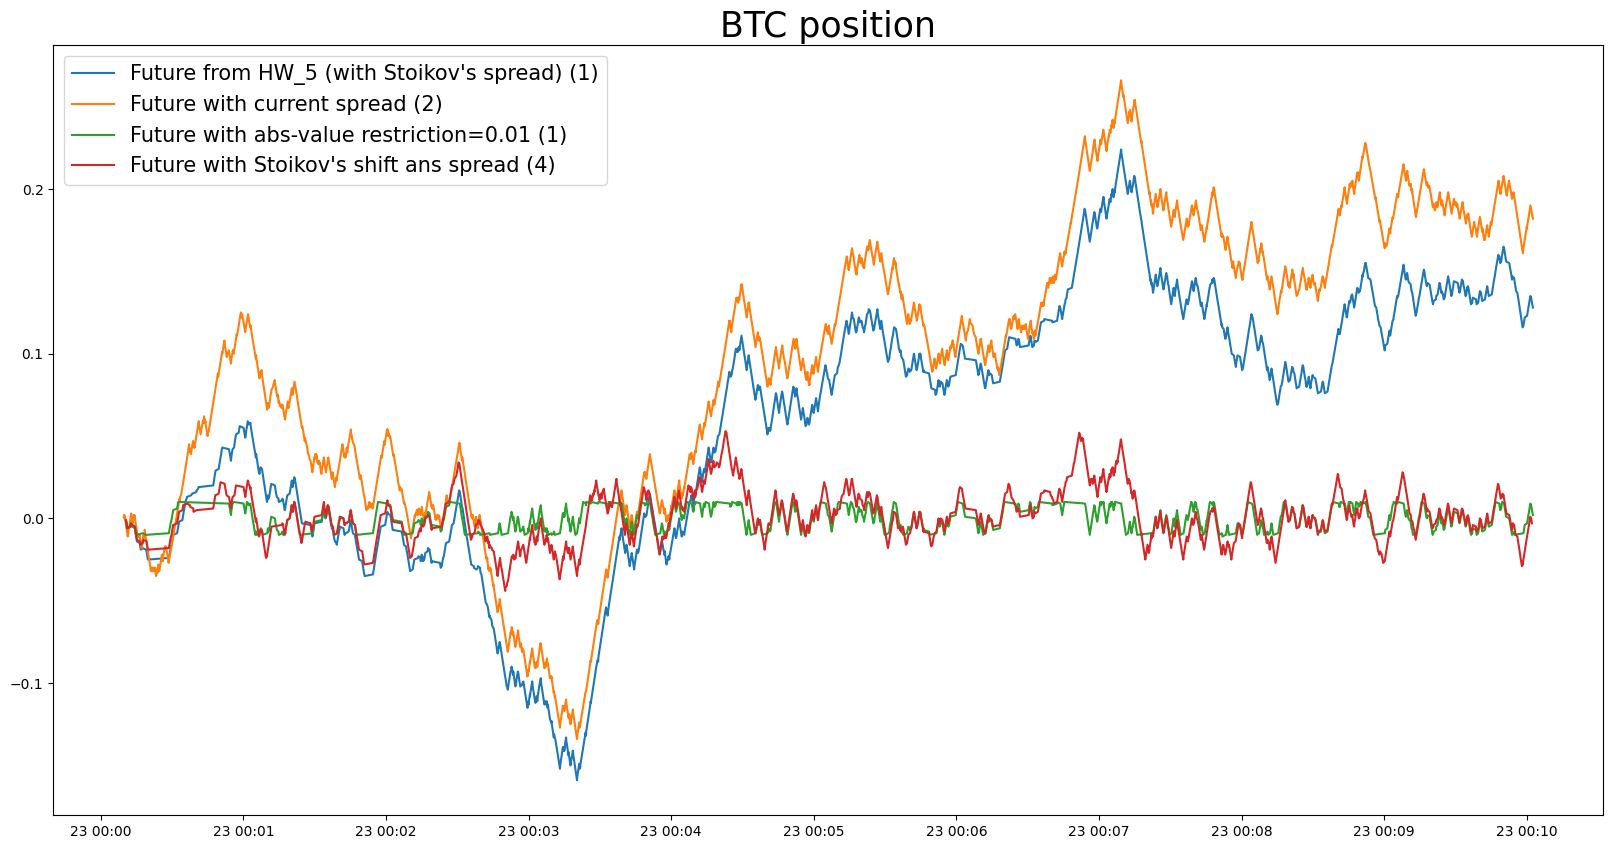

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(pd.to_datetime(logs_1['own_trade_time']), logs_1['asset_position'], label="Future from HW_5 (with Stoikov's spread) (1)")
plt.plot(pd.to_datetime(logs_2['own_trade_time']), logs_2['asset_position'], label="Future with current spread (2)")
plt.plot(pd.to_datetime(logs_3['own_trade_time']), logs_3['asset_position'], label="Future with abs-value restriction=0.01 (1)")
plt.plot(pd.to_datetime(logs_4['own_trade_time']), logs_4['asset_position'], label="Future with Stoikov's shift ans spread (4)")

plt.legend(fontsize=15)
plt.title('BTC position', fontsize=25)
plt.plot()
plt.show()

## Теперь давайте сравним в зависимости от гиперпараметров

In [12]:
gammas = [0.0001, 0.00033, 0.001, 0.0033, 0.01, 0.033, 0.1, 0.33, 1]

### 1

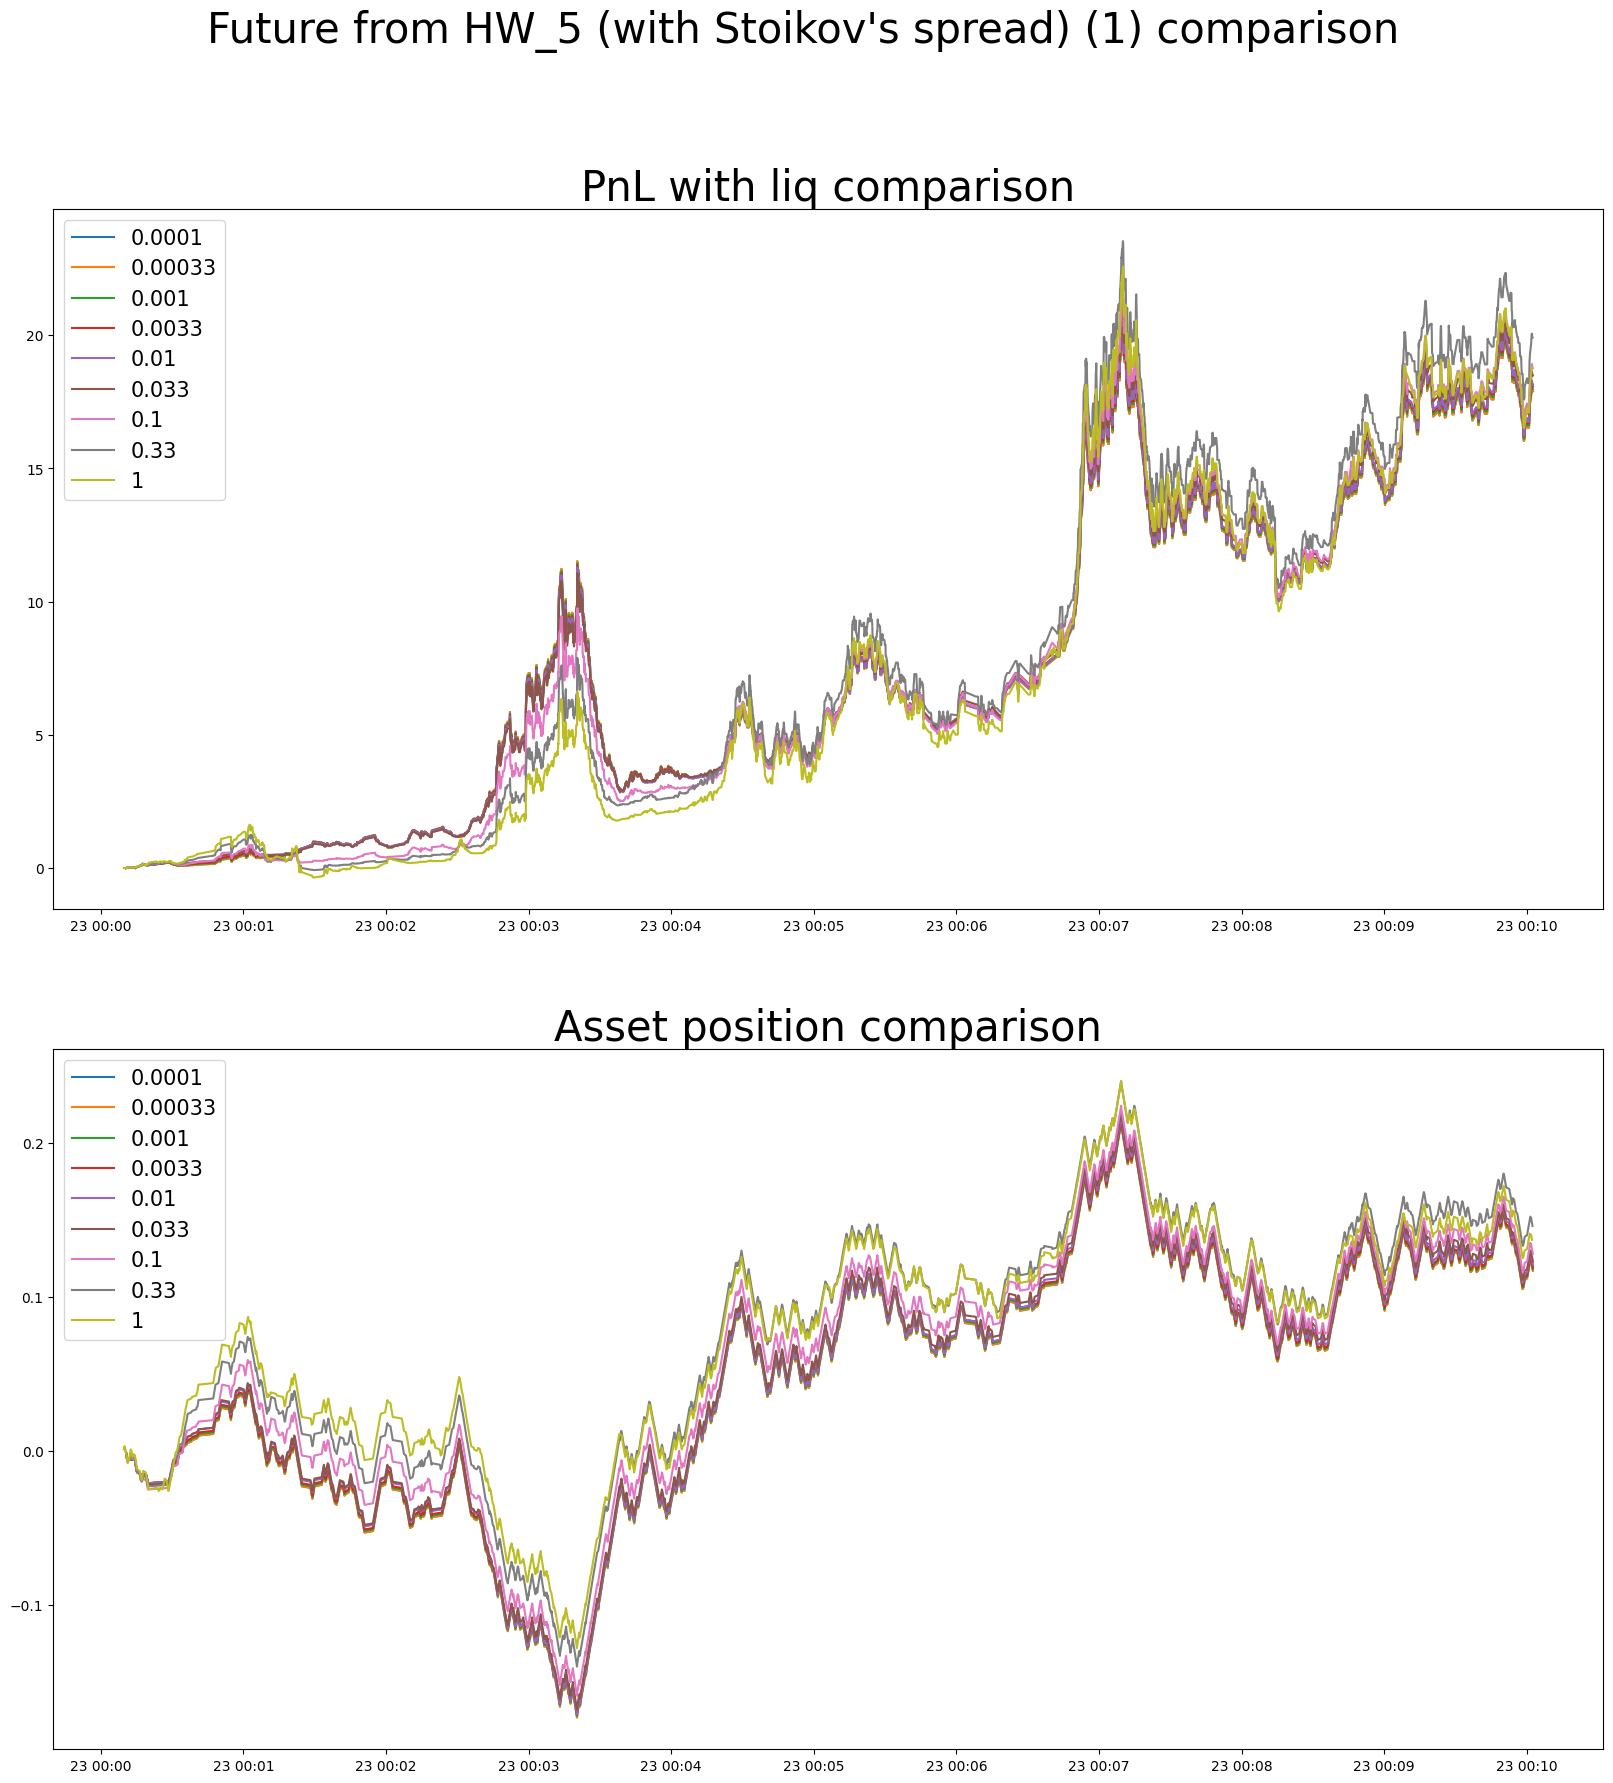

In [13]:
fig, axs = plt.subplots(2, figsize=(20, 20))
fig.suptitle("Future from HW_5 (with Stoikov's spread) (1) comparison", fontsize=30)

for gamma in gammas:
    logs_1 = run_Future(gamma=gamma)
    axs[0].plot(pd.to_datetime(logs_1['own_trade_time']), logs_1['pnl_with_liq'], label=str(gamma))
    axs[1].plot(pd.to_datetime(logs_1['own_trade_time']), logs_1['asset_position'], label=str(gamma))

axs[0].set_title("PnL with liq comparison", fontsize=30)
axs[1].set_title("Asset position comparison", fontsize=30)

axs[0].legend(fontsize=15)
axs[1].legend(fontsize=15)

plt.plot()
plt.show()

### 2

Ну там гамма прост нигде не юзается, сори.

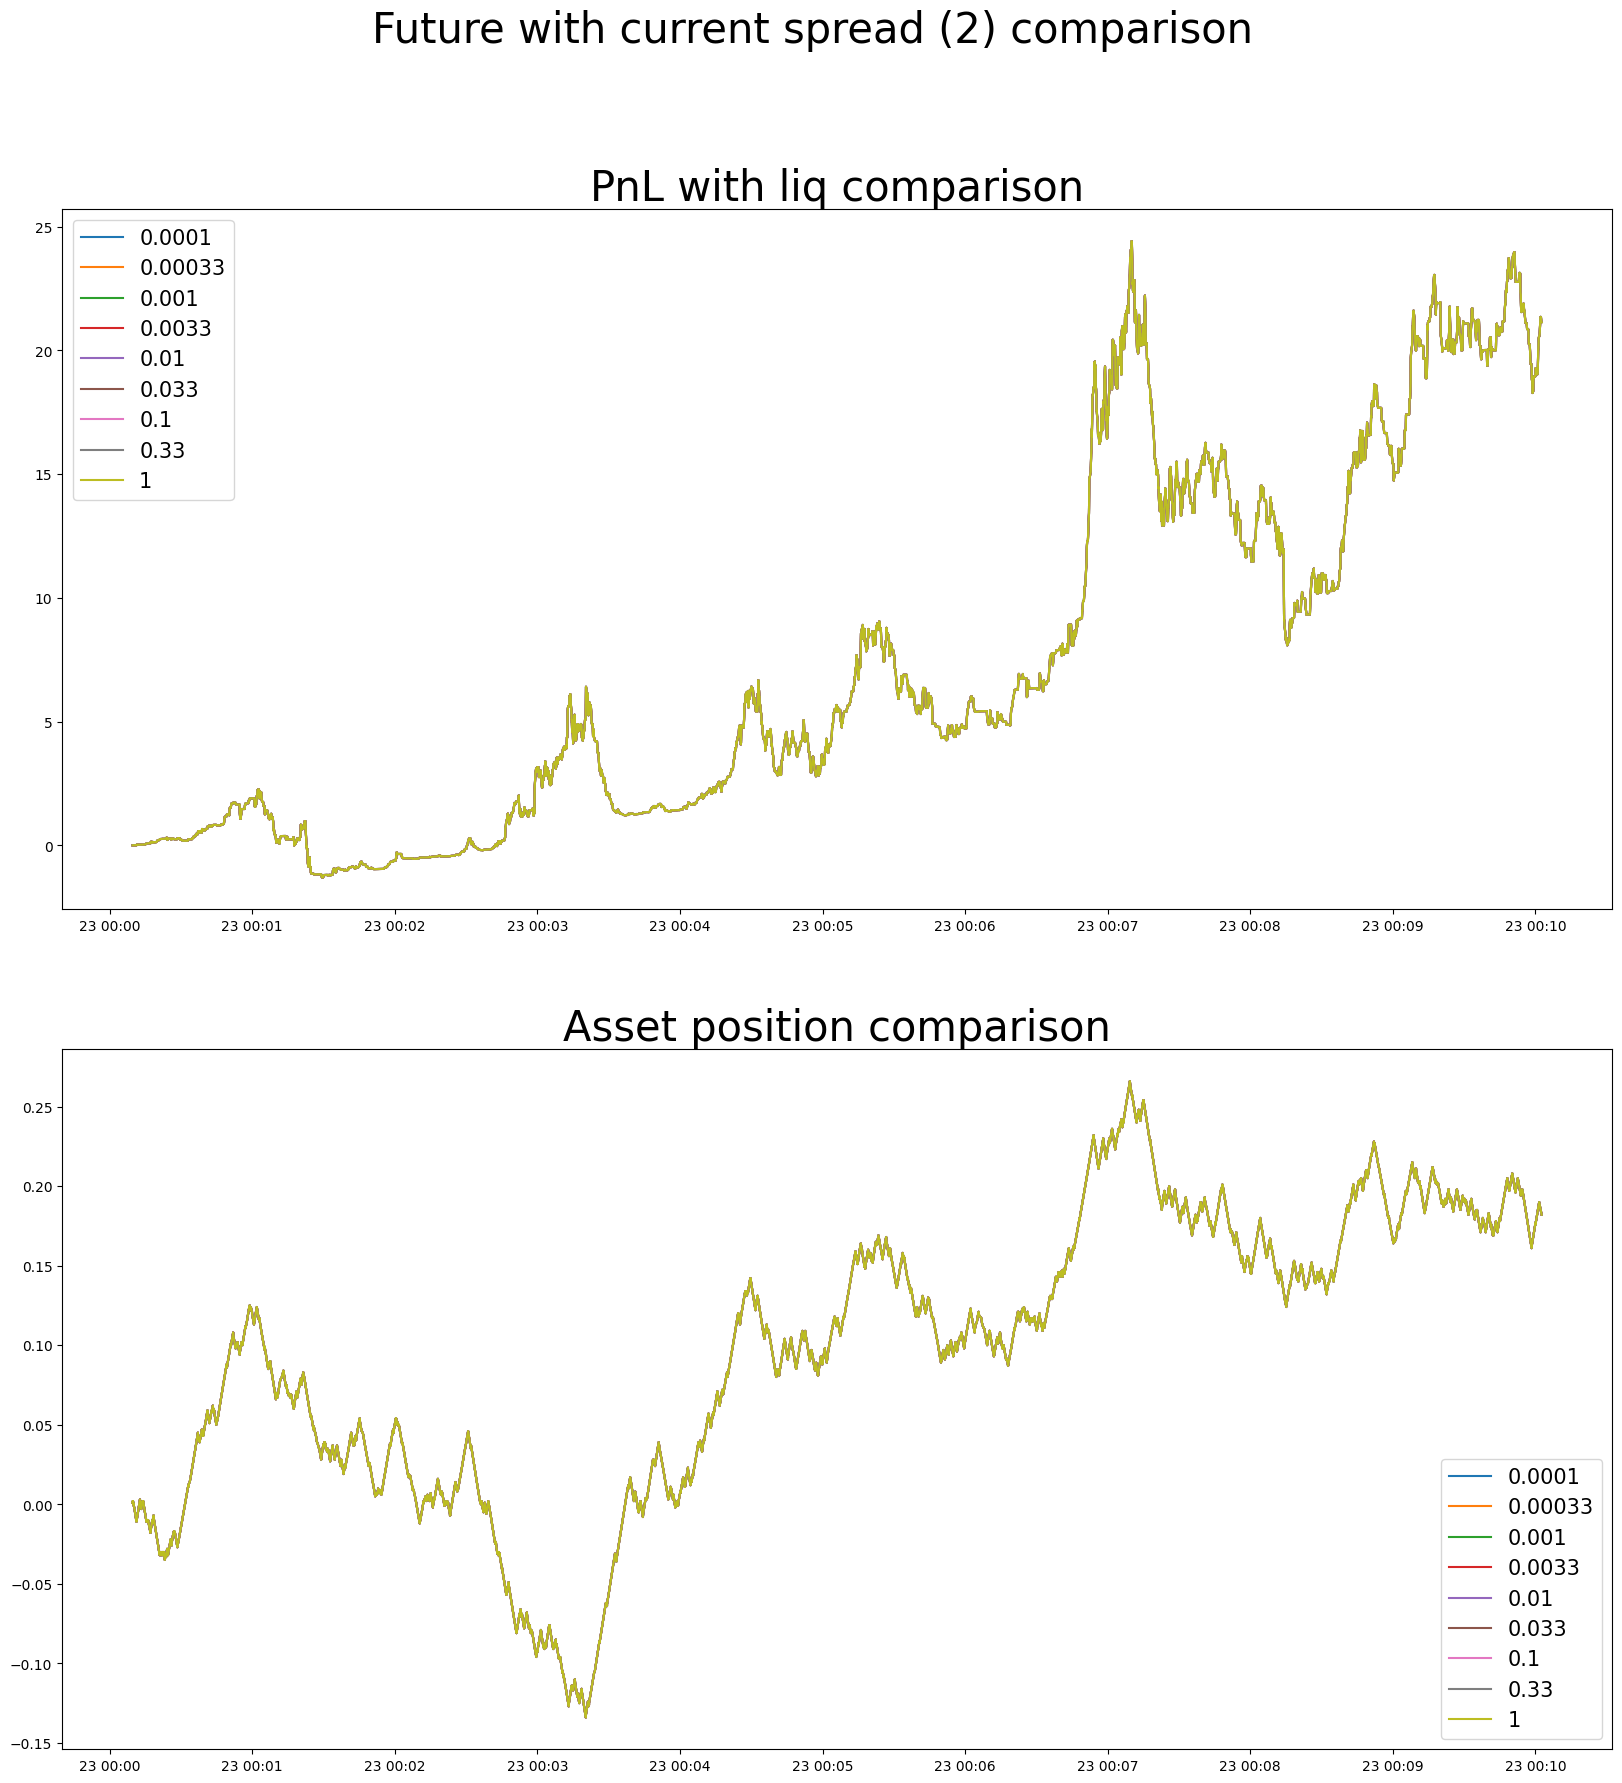

In [14]:
fig, axs = plt.subplots(2, figsize=(20, 20))
fig.suptitle("Future with current spread (2) comparison", fontsize=30)

for gamma in gammas:
    logs_2 = run_Future_Current_Spread(gamma=gamma)
    axs[0].plot(pd.to_datetime(logs_2['own_trade_time']), logs_2['pnl_with_liq'], label=str(gamma))
    axs[1].plot(pd.to_datetime(logs_2['own_trade_time']), logs_2['asset_position'], label=str(gamma))

axs[0].set_title("PnL with liq comparison", fontsize=30)
axs[1].set_title("Asset position comparison", fontsize=30)

axs[0].legend(fontsize=15)
axs[1].legend(fontsize=15)

plt.plot()
plt.show()

### 3

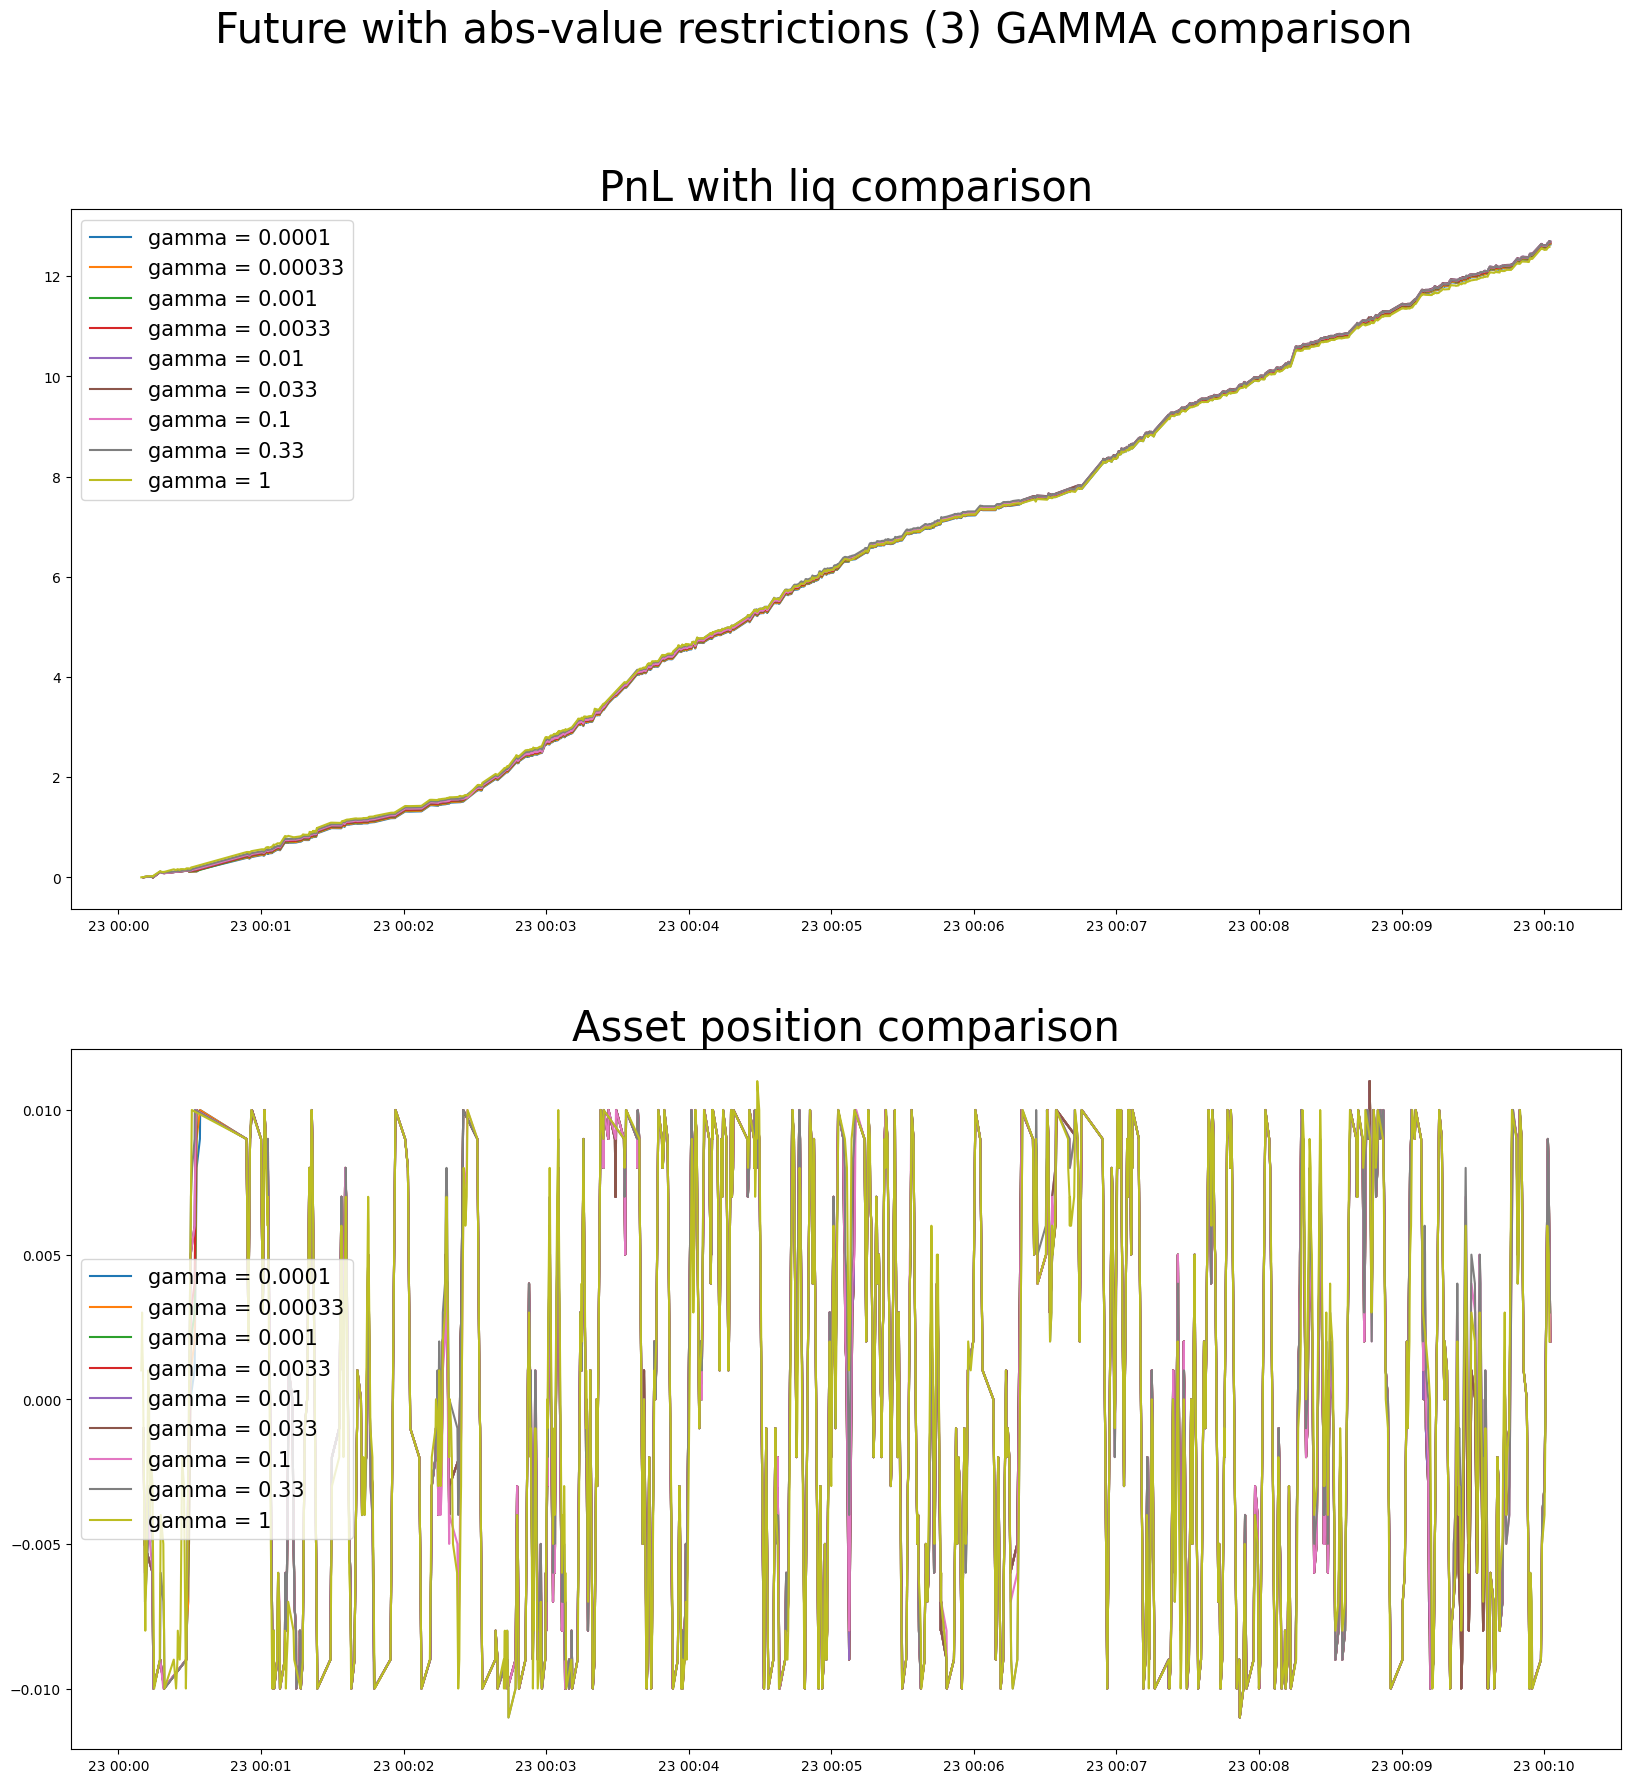

In [15]:
fig, axs = plt.subplots(2, figsize=(20, 20))
fig.suptitle("Future with abs-value restrictions (3) GAMMA comparison ", fontsize=30)

for gamma in gammas:
    logs_3 = run_Future_Absolute_Value_Restriction(gamma=gamma)
    axs[0].plot(pd.to_datetime(logs_3['own_trade_time']), logs_3['pnl_with_liq'], label="gamma = " + str(gamma))
    axs[1].plot(pd.to_datetime(logs_3['own_trade_time']), logs_3['asset_position'], label="gamma = " + str(gamma))

axs[0].set_title("PnL with liq comparison", fontsize=30)
axs[1].set_title("Asset position comparison", fontsize=30)

axs[0].legend(fontsize=15)
axs[1].legend(fontsize=15)

plt.plot()
plt.show()

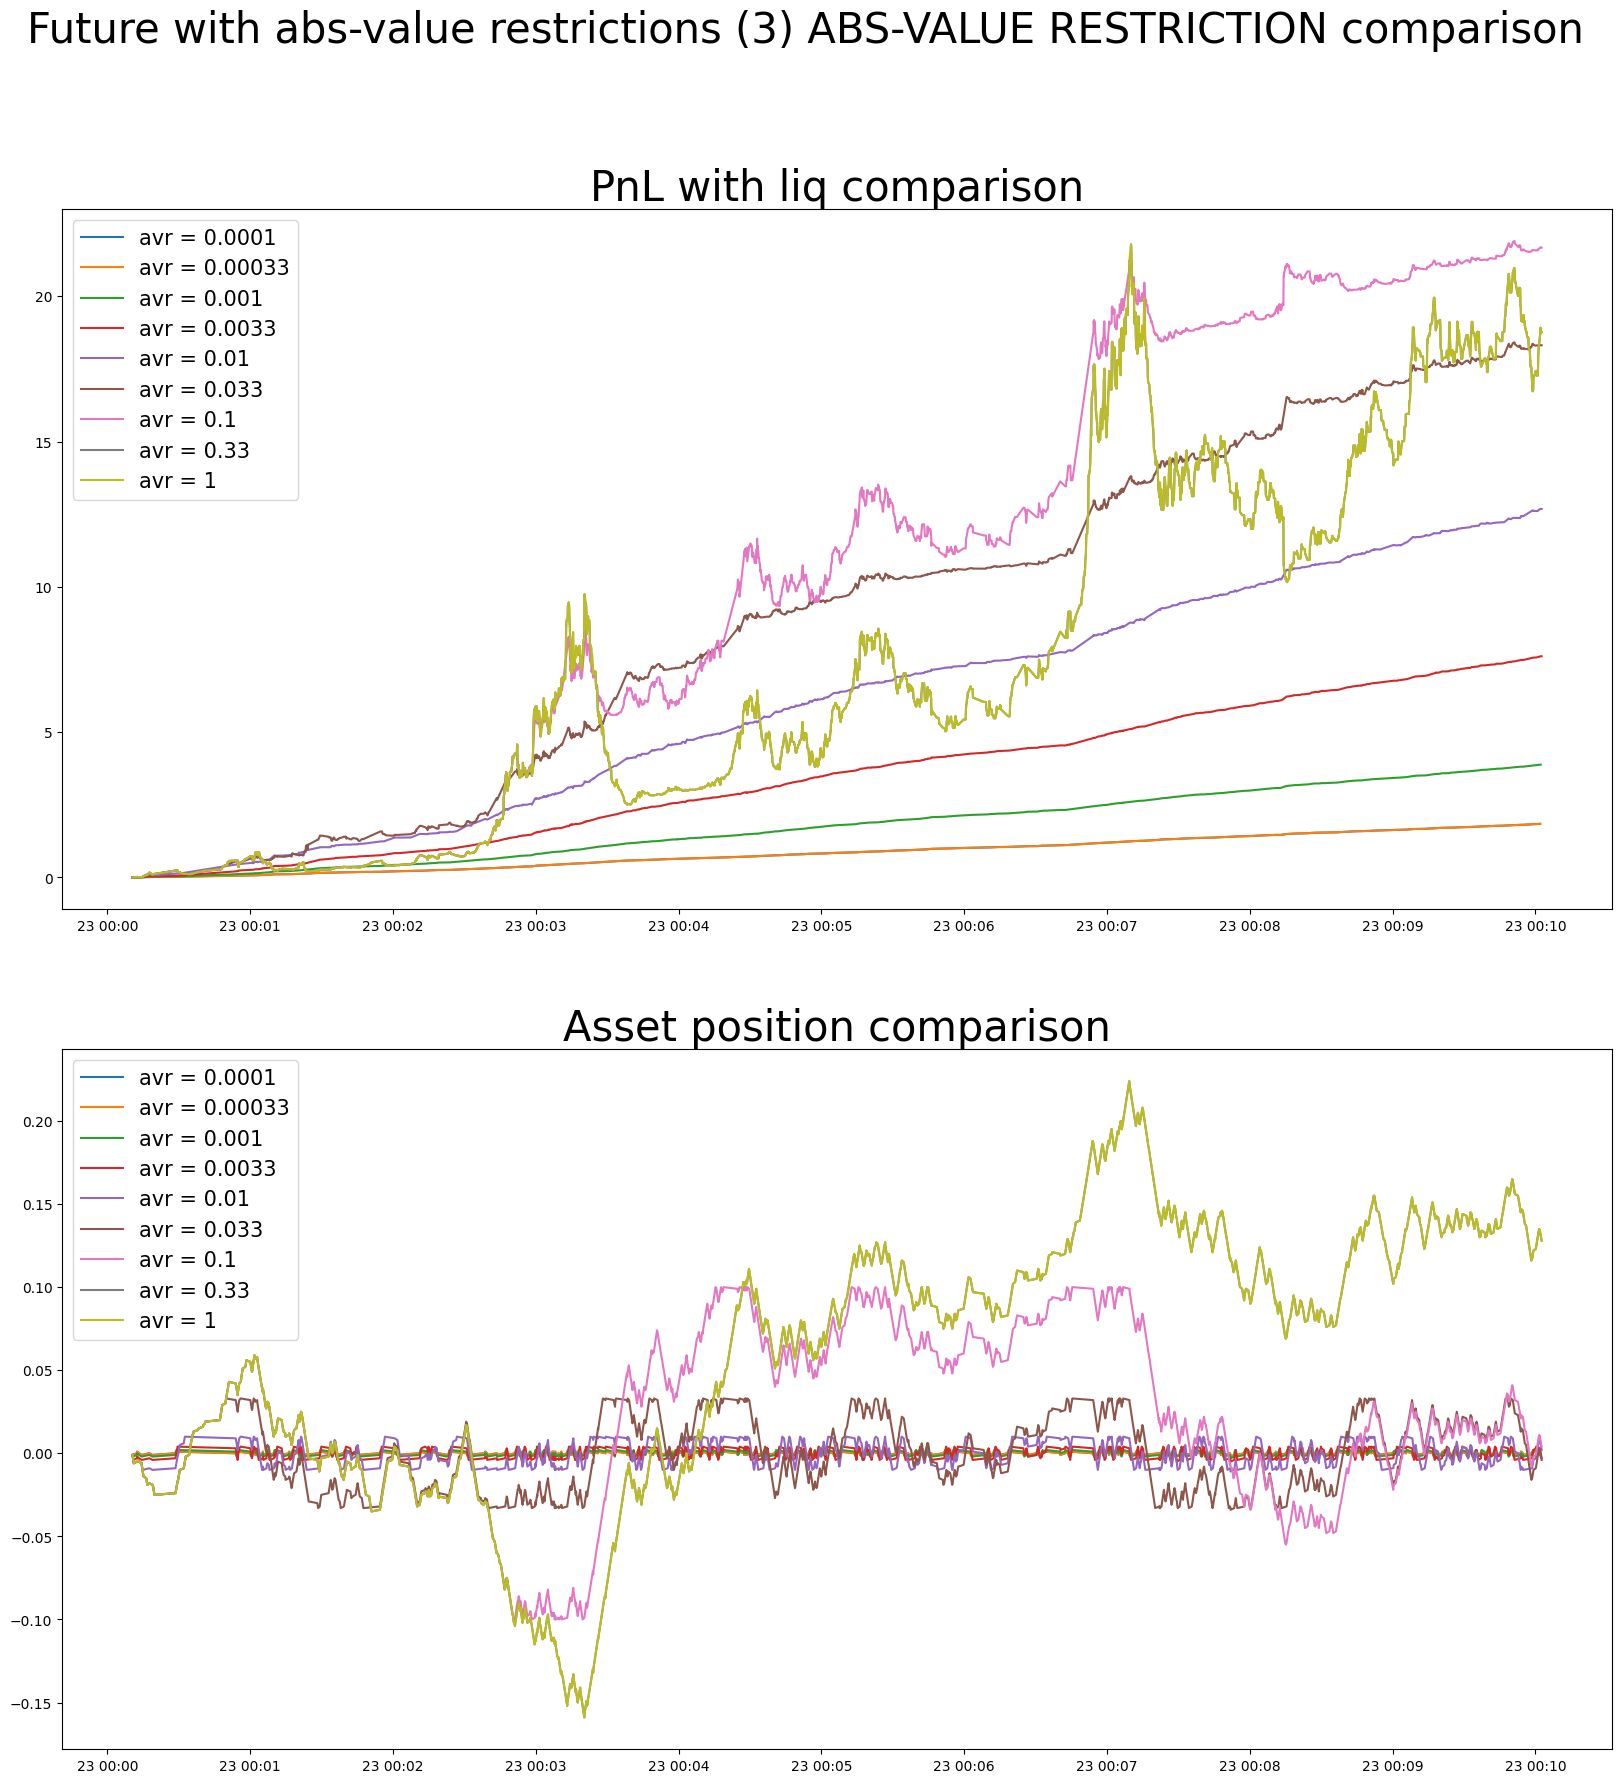

In [16]:
fig, axs = plt.subplots(2, figsize=(20, 20))
fig.suptitle("Future with abs-value restrictions (3) ABS-VALUE RESTRICTION comparison ", fontsize=30)

for avr in gammas:
    logs_3 = run_Future_Absolute_Value_Restriction(gamma=0.1, abs_value_restriction=avr)
    axs[0].plot(pd.to_datetime(logs_3['own_trade_time']), logs_3['pnl_with_liq'], label="avr = " + str(avr))
    axs[1].plot(pd.to_datetime(logs_3['own_trade_time']), logs_3['asset_position'], label="avr = " + str(avr))

axs[0].set_title("PnL with liq comparison", fontsize=30)
axs[1].set_title("Asset position comparison", fontsize=30)

axs[0].legend(fontsize=15)
axs[1].legend(fontsize=15)

plt.plot()
plt.show()

### 4

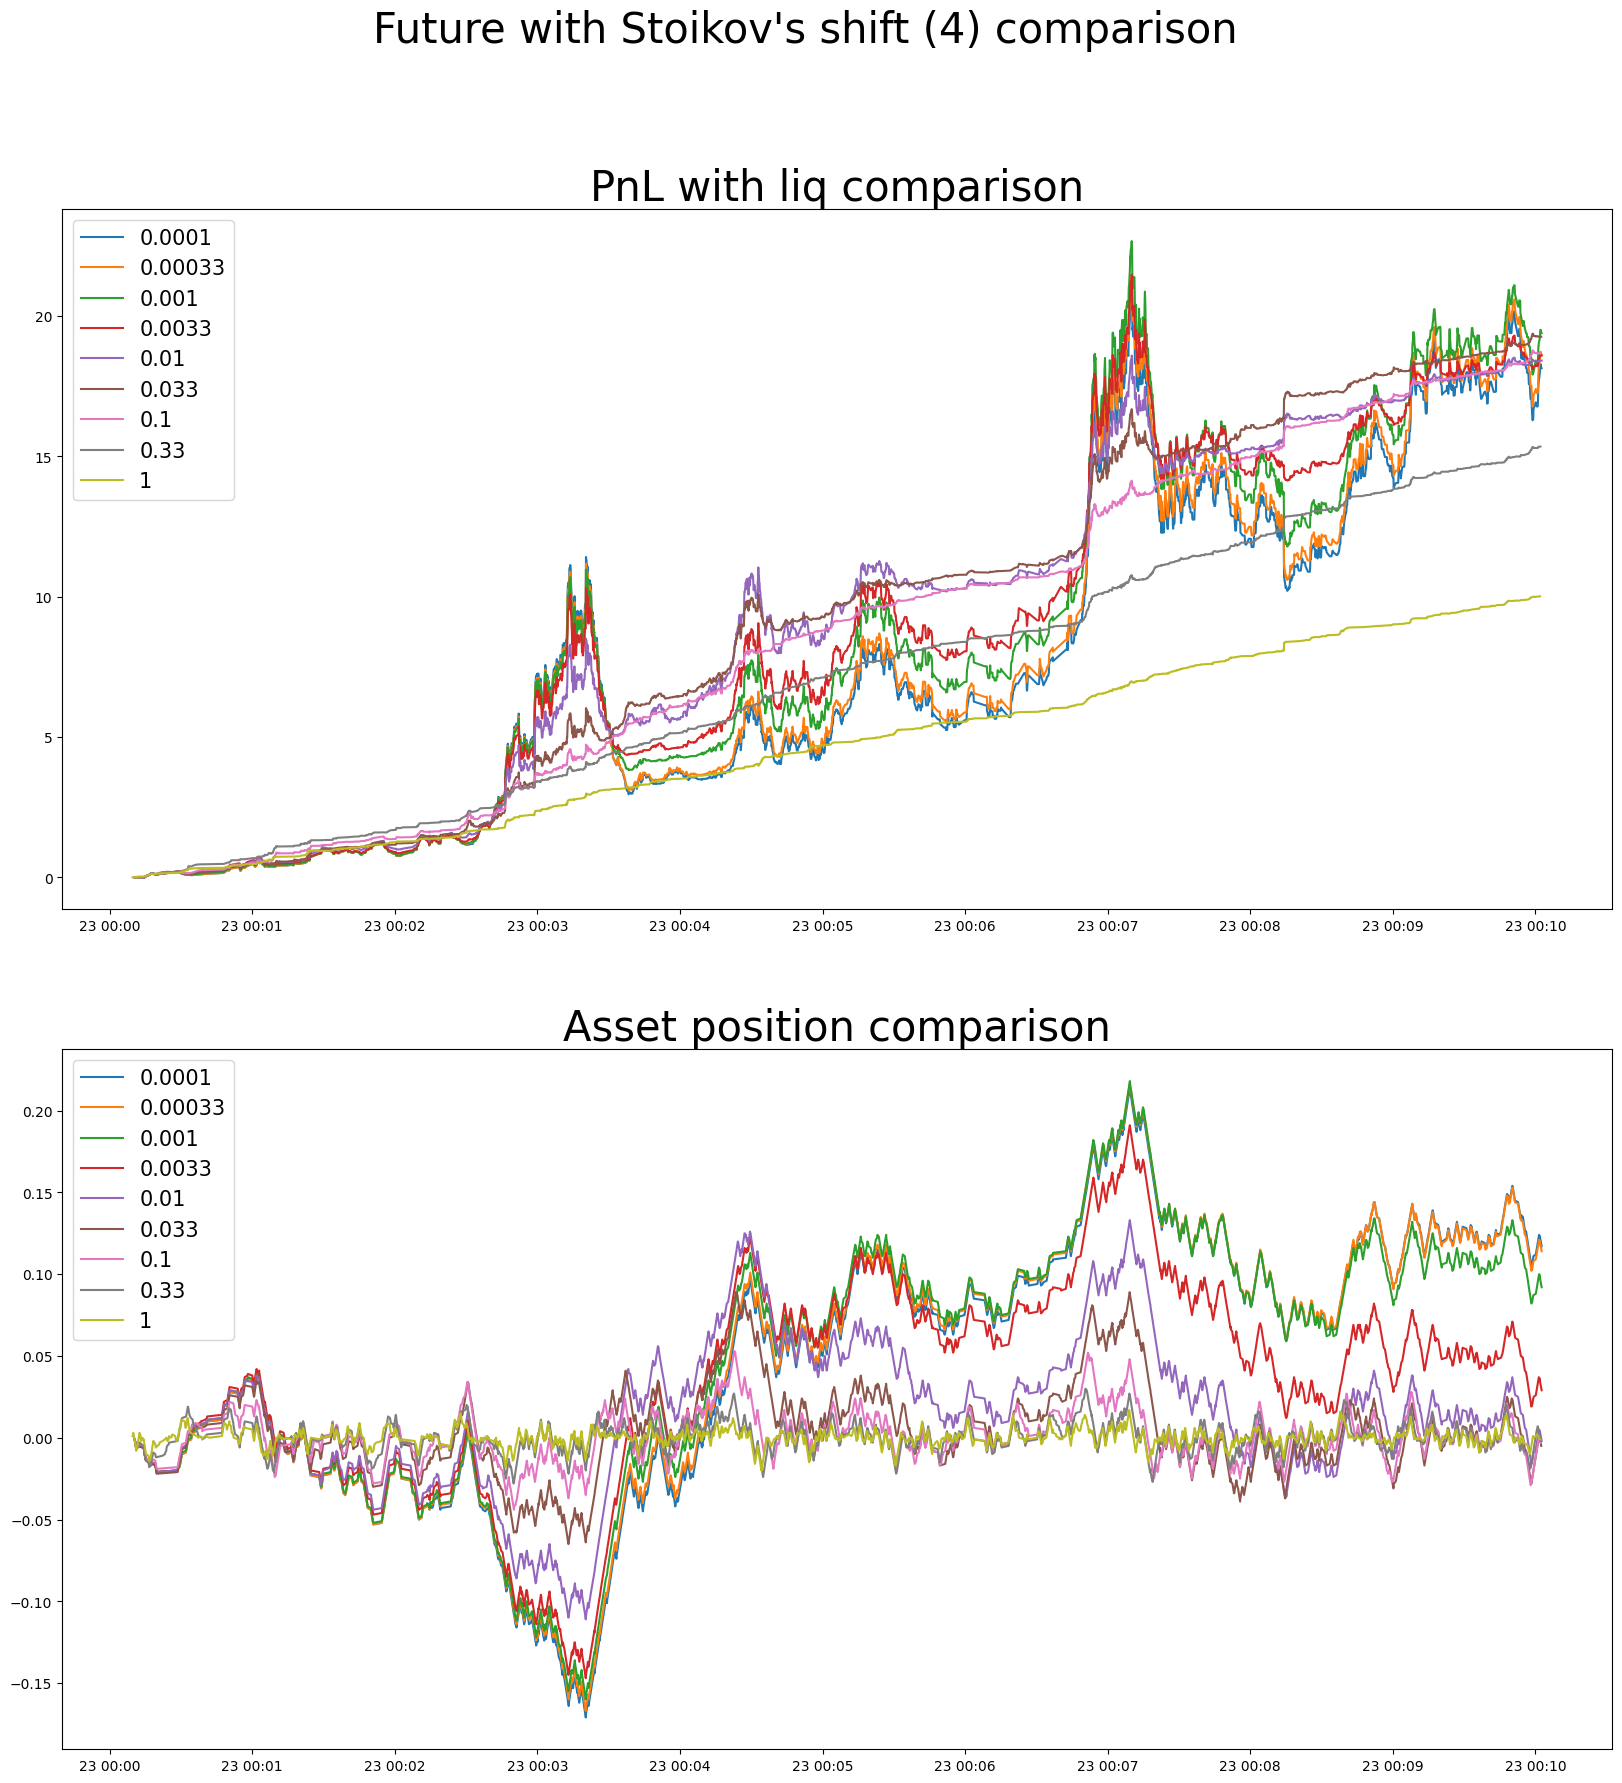

In [17]:
fig, axs = plt.subplots(2, figsize=(20, 20))
fig.suptitle("Future with Stoikov's shift (4) comparison ", fontsize=30)

for gamma in gammas:
    logs_4 = run_Future_Stoikov(gamma=gamma)
    axs[0].plot(pd.to_datetime(logs_4['own_trade_time']), logs_4['pnl_with_liq'], label=str(gamma))
    axs[1].plot(pd.to_datetime(logs_4['own_trade_time']), logs_4['asset_position'], label=str(gamma))

axs[0].set_title("PnL with liq comparison", fontsize=30)
axs[1].set_title("Asset position comparison", fontsize=30)

axs[0].legend(fontsize=15)
axs[1].legend(fontsize=15)

plt.plot()
plt.show()

В итоге мы видим, как более "осторожные" подходы дают стабильно возрастающий результат, в то время, как более рискованные на выходе дают больший pnl, но "скачут".

## Сравнение по метрикам

Простая интуиция - использовать классические метрики качества моделей.
Здесь будут Maximum Drawdown и Sharpe Ratio каждого вида в зависимости от параметров.
(в TechCore появился раздел метрики)

На самом деле, мне кажется, что Drawdown здесь немного неправильные, что ли. В плане - небольшая просадка в начале уже дает ~ -1 и поскольку это максимум - оно такое на весь pnl вперед. Так что мб это надо как-то фиксить (типо средней или квантиль какой-то)

In [36]:
import TechCore.Metrics.Metrics as Metrics
reload(Metrics)

<module 'TechCore.Metrics.Metrics' from 'C:\\Users\\artem\\.Computer Science\\CMF\\Projects\\High_Frequency_Market_Making\\TechCore\\Metrics\\Metrics.py'>

In [37]:
logs_1 = run_Future(0.1)
metrics = Metrics.GetMetrics(pd.Series(logs_1['pnl_with_liq']))

In [39]:
metrics['MaximumDrawdown']

-0.8499390941977537

In [43]:
run_Future_logs = []
for gamma in gammas:
    logs = run_Future(gamma)
    run_Future_logs.append(Metrics.SharpeRatio(pd.Series(logs['pnl_with_liq'])))

In [44]:
run_Future_Current_Spread_logs = []
for gamma in gammas:
    logs = run_Future_Current_Spread(gamma)
    run_Future_Current_Spread_logs.append(Metrics.SharpeRatio(pd.Series(logs['pnl_with_liq'])))

In [46]:
run_Future_Absolute_Value_Restriction_logs = []
for gamma in gammas:
    logs = run_Future_Absolute_Value_Restriction(gamma)
    run_Future_Absolute_Value_Restriction_logs.append(Metrics.SharpeRatio(pd.Series(logs['pnl_with_liq'])))

In [47]:
run_Future_Stoikov_logs = []
for gamma in gammas:
    logs = run_Future_Stoikov(gamma)
    run_Future_Stoikov_logs.append(Metrics.SharpeRatio(pd.Series(logs['pnl_with_liq'])))

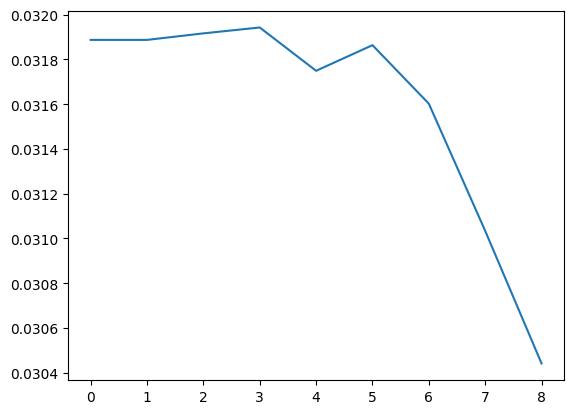

In [49]:
plt.plot(run_Future_logs)

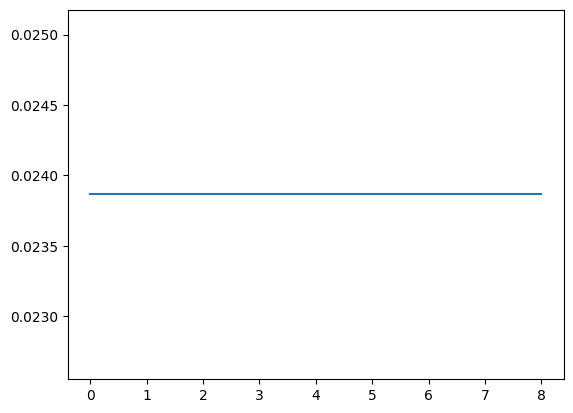

In [50]:
plt.plot(run_Future_Current_Spread_logs)

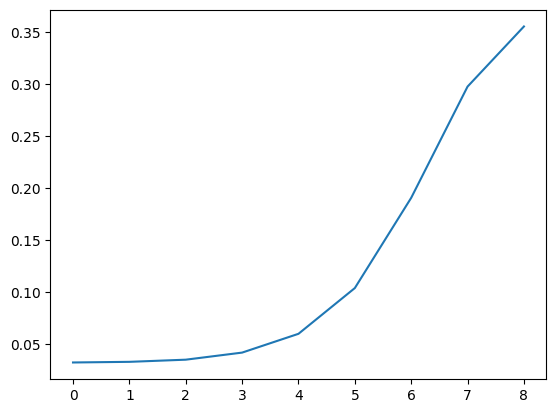

In [52]:
plt.plot(run_Future_Stoikov_logs)

И так - Future со сдвигом Стоикова (Future_Stoikov.py; (4)) показывает себя лучше всего!